# 05_05: Weather Charts

In [ ]:
# note: this notebook requires Python 3.6 or higher

In [2]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

<img src="nytimes.png">

In [3]:
import getweather

In [5]:
# for records: get TMIN/TMAX arrays for years 1910-2018, stack vertically in array

allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                      for year in range(1910, 2019)])

In [12]:
allyears

array([[( 2.2, 12.2), ( 1.1, 10. ), (-0.6, 11.7), ..., ( 1.7, 21.1),
        ( 0.6, 18.9), ( 1.1, 17.2)],
       [(-0.6, 18.3), ( 0.6, 20.6), ( 1.1, 21.1), ..., ( 0. , 13.9),
        (-1.7, 14.4), (-1.7, 13.9)],
       [( 3.3, 15. ), ( 2.2, 16.1), ( 0. , 17.2), ..., (-0.6, 18.3),
        ( 0.6, 21.1), ( 2.2, 20. )],
       ...,
       [( 4.4, 17.8), ( 4.4, 17.2), ( 6.7, 17.8), ..., ( 5.6, 18.3),
        ( 4.4, 15.6), ( 4.4, 14.4)],
       [( 3.3, 11.7), ( 3.3, 13.9), ( 6.7, 12.2), ..., ( 9.4, 29.4),
        ( 9.4, 30.6), ( 8.9, 25.6)],
       [( 8.3, 21.7), ( 8.9, 22.8), (11.7, 27.2), ..., ( 2.2, 16.1),
        ( 5. , 18.3), ( 7.8, 17.2)]],
      dtype=[('TMIN', '<f8'), ('TMAX', '<f8')])

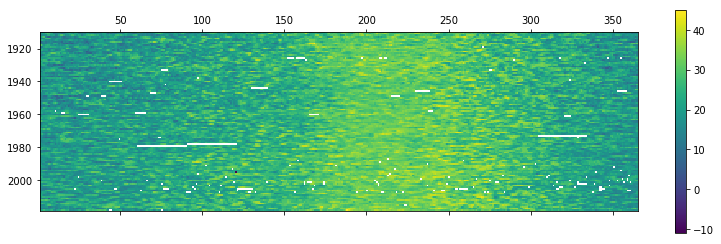

In [6]:
# show stacked array as colored map, specifying axis values,
# and creating temperature-reference colorbar

pp.matshow(allyears['TMAX'], extent=[1,365,2019,1910])
pp.colorbar()

In [30]:
# min and max of TMIN/TMAX along all years, excluding NaNs

tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

In [31]:
allyears['TMIN'][0]

array([ 2.2,  1.1, -0.6, -2.2, -2.8, -2.2, -1.7,  0.6,  0.6,  5. ,  4.4,
        2.2,  3.9,  5. ,  7.8,  3.3,  1.1,  0.6, -0.6,  3.3, 11.1,  8.9,
        6.1,  4.4,  1.1,  1.1,  2.8,  5.6,  4.4,  5. ,  5. ,  3.3, -1.1,
       -1.1,  1.1,  1.7,  1.1,  3.9,  2.8,  2.8,  3.3,  5.6,  6.7,  6.7,
        7.8,  3.3,  1.7,  1.1,  1.7,  3.9,  2.2,  5.6,  4.4,  3.3,  6.1,
        7.8,  3.9,  6.1,  7.2,  8.9, 10. , 10. , 10. ,  6.1,  7.2,  7.8,
        8.3,  8.9,  8.9,  3.3,  6.7,  7.2,  7.2, 10. ,  8.9, 10. , 11.1,
       11.1, 10.6,  9.4,  6.7,  6.7,  3.3,  5.6,  5.6,  2.8,  nan,  4.4,
        6.7,  7.8,  7.2,  6.7, 12.2, 11.7, 11.7, 11.1,  6.7,  6.7, 11.7,
        6.1,  6.1,  4.4,  8.3,  7.2,  8.9,  7.8,  8.3,  8.9,  8.9,  6.1,
        6.1, 11.1, 13.9, 14.4, 11.7,  7.8, 10.6,  8.9,  5.6,  5. , 11.7,
        8.3,  7.8,  7.2,  7.8,  6.1,  8.3,  9.4, 11.1, 10.6,  8.3,  9.4,
        9.4, 11.7, 12.2, 13.3, 11.7, 11.7,  9.4,  9.4,  9.4,  8.3,  8.3,
       11.7, 10. , 10.6, 10.6, 12.8, 12.8, 13.3, 15

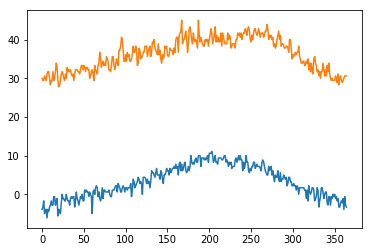

In [32]:
pp.plot(tmin_record)
pp.plot(tmax_record)

In [33]:
# for normals: get TMIN/TMAX arrays for years 1981-2010, stack vertically in array

normal = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                    for year in range(1981, 2011)])

In [34]:
# mean of TMIN/TMAX across 1981-2010 years, excluding NaNs

tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

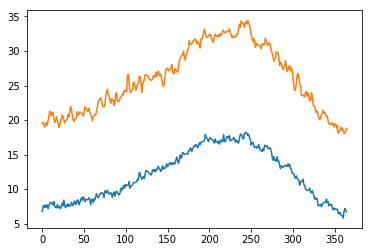

In [35]:
pp.plot(tmin_normal)
pp.plot(tmax_normal)

In [36]:
station, year = 'PASADENA', 2018

thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

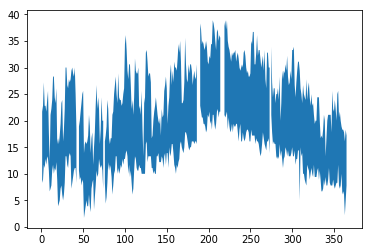

In [37]:
# fill area between horizontal curves (days, thisyear['TMIN']) and (days, thisyear['TMAX'])

days = np.arange(1, 366)

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])

In [38]:
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))

In [39]:
avg

19.4620142532151

In [53]:
mc_temp = np.mean([0.5*(np.nanmean(allyears['TMIN'][year-1910])+np.nanmean(allyears['TMAX'][year-1910])) for year in range(1945,1956)]) 
Temp_anom = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX'])) - mc_temp # temp anomaly calculated for a year as years average temperature minus the midcentury temp

#pp.plot

In [62]:
mc_temp

17.0074748277656

In [41]:
# formatted string literal: will insert values of variable in braces
f'{station}, {year}: average temperature = {avg:.2f} C'

'PASADENA, 2018: average temperature = 19.46 C'

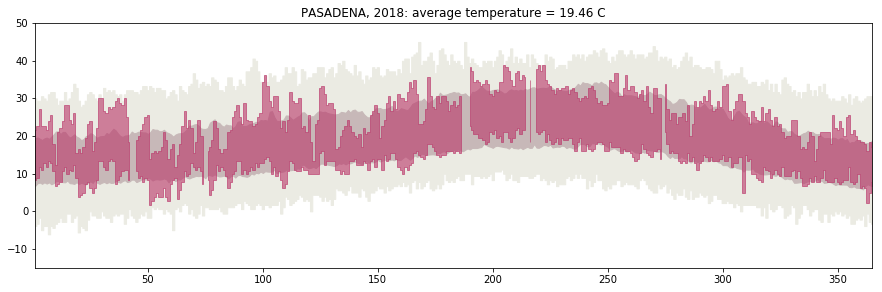

In [42]:
# show normals, records, and current year bands together

pp.figure(figsize=(15,4.5))

pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                color=(0.73,0.21,0.41), alpha=0.6, step='mid')

pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)

pp.title(f'{station}, {year}: average temperature = {avg:.2f} C');

In [43]:
# collect data and make chart for any city and current year,
# following the same steps as above

def nyplot(station, year):
    pp.figure(figsize=(15,4.5))
    
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])
    
    normal = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                        for year in range(1981, 2011)])

    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)

    pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))
    
    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')

    pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
    
    avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    pp.title(f'{station}, {year}: average temperature = {avg:.2f} C');

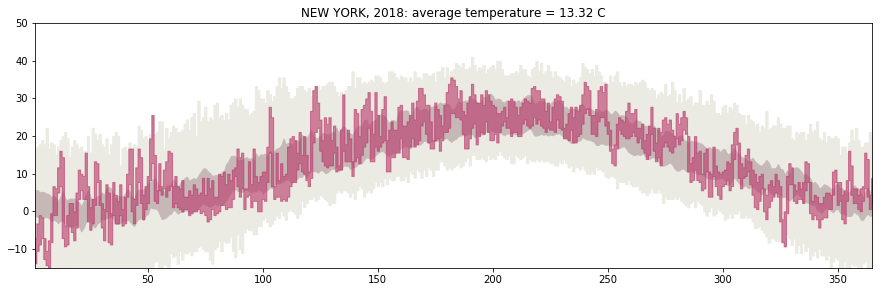

In [44]:
nyplot('NEW YORK', 2018)

In [45]:
Temp_anom = np.zeros(np.array([1,1,3,4]).shape)

In [46]:
Temp_anom

array([0., 0., 0., 0.])

In [27]:
allyears = np.vstack([getweather.getyear('New York', ['TMIN','TMAX'], year)
                          for year in range(1880, 2020)])
mc_temp = np.nanmean([0.5*(allyears['TMIN'][year-1910] + allyears['TMAX'][year-1910]) for year in range(1945,1956)])

In [28]:
def taplot(station, years):    # give years as an array
    pp.figure(figsize=(15,4.5))
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1880, 2020)])
    mc_temp = np.nanmean([0.5*(allyears['TMIN'][year-1910] + allyears['TMAX'][year-1880]) for year in range(1945,1956)])
    Temp_anom = np.zeros(years.shape)
    for i, year in enumerate(years):
            Temp_anom[i] = 0.5*(np.nanmean(allyears['TMIN'][year-1880]) + np.nanmean(allyears['TMAX'][year-1880])) - mc_temp # temp anomaly calculated for a year as years average temperature minus the midcentury temp
            
    pp.plot(years, Temp_anom)
return mc_temp, allyears    

(11.679701120797011,
 array([[( -0.6,   4.4), (  2.2,   7.8), (  2.8,   4.4), ...,
         (-12.2,   0. ), (-15.6, -12.2), (-21.1, -15.6)],
        [(-17.2,  -8.9), (-12.2,   1.1), ( -7.8,   2.8), ...,
         (  7.2,  11.1), (  2.2,  11.1), ( -4.4,   2.2)],
        [( -7.8,  -0.6), (-12.8,  -7.2), (-11.7,  -1.7), ...,
         ( -5. ,   1.7), ( -3.3,   0.6), ( -1.7,   2.2)],
        ...,
        [(  4.4,   8.9), (  2.8,   5. ), (  3.9,   6.1), ...,
         (-11.6,  -5.5), ( -8.2,  -4.9), (-12.7,  -6. )],
        [(-13.8,  -7.1), (-10.5,  -3.2), ( -8.8,  -1. ), ...,
         (  3.9,  13.9), (  0.6,   4.4), (  2.2,   8.9)],
        [(  3.9,  14.4), (  1.7,   4.4), (  2.8,   6.7), ...,
         (  3.9,   6.7), (  2.8,   5. ), (  2.2,   7.2)]],
       dtype=[('TMIN', '<f8'), ('TMAX', '<f8')]))

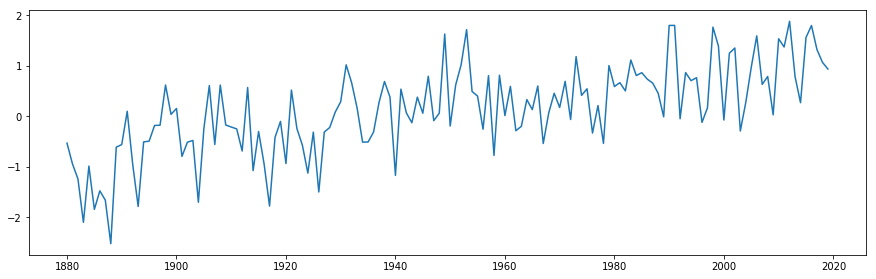

In [29]:
taplot('NEW YORK', np.arange(1880, 2020))

In [8]:
mc_temp

11.679701120797011

In [58]:
enumerate(np.arange(2000, 2018)) 

In [17]:
mc_temp = np.nanmean([0.5*(allyears['TMIN'][year-1880] + allyears['TMAX'][year-1880]) for year in range(1945,1956)]) 


In [18]:
mc_temp

12.838767123287672

In [13]:
alldata = [0.5*(allyears['TMIN'][year-1880] + allyears['TMAX'][year-1880]) for year in np.arange(1945,1956)]

In [14]:
np.nanmean(np.array(alldata))

12.838767123287672

In [99]:
np.array(alldata).shape

(11, 365)

In [121]:
allyears

array([[( 2.2, 12.2), ( 1.1, 10. ), (-0.6, 11.7), ..., ( 1.7, 21.1),
        ( 0.6, 18.9), ( 1.1, 17.2)],
       [(-0.6, 18.3), ( 0.6, 20.6), ( 1.1, 21.1), ..., ( 0. , 13.9),
        (-1.7, 14.4), (-1.7, 13.9)],
       [( 3.3, 15. ), ( 2.2, 16.1), ( 0. , 17.2), ..., (-0.6, 18.3),
        ( 0.6, 21.1), ( 2.2, 20. )],
       ...,
       [( 4.4, 17.8), ( 4.4, 17.2), ( 6.7, 17.8), ..., ( 5.6, 18.3),
        ( 4.4, 15.6), ( 4.4, 14.4)],
       [( 3.3, 11.7), ( 3.3, 13.9), ( 6.7, 12.2), ..., ( 9.4, 29.4),
        ( 9.4, 30.6), ( 8.9, 25.6)],
       [( 8.3, 21.7), ( 8.9, 22.8), (11.7, 27.2), ..., ( 2.2, 16.1),
        ( 5. , 18.3), ( 7.8, 17.2)]],
      dtype=[('TMIN', '<f8'), ('TMAX', '<f8')])

In [105]:
allyears['TMIN'][2] + allyears['TMAX'][2]

array([18.3, 18.3, 17.2, 19.5, 28.3, 27.8, 24.4, 25.5, 26.6, 20. , 22.7,
       26.6, 35.6, 38.3, 31.6, 24.5, 23.3, 22.2, 25. , 32.8, 36.1, 29.4,
       23.9, 29.4, 26.1, 18.9, 20.6, 22.8, 27.8, 31.6, 30.6, 33.9, 32.8,
       29.5, 25.6, 27.8, 21.1, 21.7, 24.5, 26.7, 25. , 27.2, 27.7, 25.6,
       22.2, 24.5, 33.4, 35. , 32.3, 33.9, 29.4, 22.8, 32.8, 22.2, 26.1,
       19.5, 22.8, 29.4, 31.7, 25.5, 22.2, 21.7, 17.2, 25. , 28.3, 25.6,
       18.9, 18.8, 19.4, 21.1, 18.9, 15. , 15.6, 19.4, 20.5, 21.7, 23.3,
       27.3, 23.3, 22.2, 18.4, 20.5, 23.9, 25. , 20. , 20.6, 19.4, 25. ,
       22.2, 18.9, 20.6, 25. , 25.6, 25. , 23.9, 23.4, 27.8, 29.4, 22.2,
       17.8, 19.5, 15. , 17.2, 17.8, 25. , 25. , 25. , 28.3, 27.8, 26.7,
       27.2, 25.6, 27.2, 33.4, 27.8, 27.3, 23.3, 27.8, 26.7, 26.1, 32.8,
       27.8, 31.7, 28.9, 31.7, 27.3, 26.2, 31.1, 30. , 27.8, 30. , 33.9,
       33.4, 41.7, 41.2, 43.9, 40.6, 37.2, 32.2, 33.8, 33.3, 30. , 26.7,
       29.5, 34.5, 25.6, 28.3, 35.5, 43.4, 37.8, 38

# Some experiments with np.nanmean

In [109]:
Array1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.nanmean(Array1, axis=1)

array([2., 5., 8.])

In [113]:
(Array1[0])[2]

3

In [122]:
station = 'NEW YORK'

allyears1 = np.arange(1880, 2020)

alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                     for year in allyears1])

In [123]:
alldata == allyears

C:\Users\admin\Documents\CyberLink\New folder\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [126]:
allyears = np.vstack([getweather.getyear('NEW YORK', ['TMIN','TMAX'], year)
                      for year in range(1880, 2020)])

In [127]:
alldata.shape

(140, 365)

In [128]:
allyears.shape

(140, 365)

In [129]:
alldata == allyears

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [131]:
# compute (TMIN + TMAX)/2, averaged over days in every year
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

In [132]:
allavg.shape

(140,)

In [133]:
midcentury = np.nanmean(allavg[65:75])

In [134]:
midcentury

12.858013698630137

In [30]:
station_file = getweather.getfile('HILO')

In [31]:
w = np.genfromtxt(station_file,
                      delimiter=[11,4,2,4] + [5,1,1,1]*31,
                      # we will not use the daily flags, so this list becomes
                      # 0, 1, 2, 3, 4, 8, 12, 16, 20, 24...
                      usecols=[0,1,2,3] + list(range(4,4*32,4)),
                      # the names of the daily observations will be day1, day2, day3, ...
                      names=['id','year','month','element'] + [f'day{i}' for i in range(1,32)],
                      dtype=['U11','i','i','U4'] + ['d']*31,
                      autostrip=True)


In [33]:
w

array([('USW00021504', 1949, 10, 'TMAX',   278.,  2.780e+02,  2.780e+02,  2.890e+02, 289.,   300.,   261.,  2.670e+02,  2.780e+02,  2.720e+02,   267.,   267.,   267.,  2.670e+02,   261.,   261.,   261.,   272.,   256.,   272.,  2.670e+02,   267.,   267.,   272.,   267.,   267.,   278.,   289.,   272.,   267.,   294.),
       ('USW00021504', 1949, 10, 'TMIN',   172.,  1.890e+02,  1.780e+02,  1.830e+02, 200.,   178.,   211.,  1.830e+02,  1.830e+02,  1.830e+02,   189.,   189.,   183.,  1.780e+02,   172.,   194.,   189.,   183.,   178.,   189.,  1.830e+02,   194.,   194.,   178.,   178.,   167.,   183.,   189.,   172.,   189.,   194.),
       ('USW00021504', 1949, 10, 'PRCP',     0.,  0.000e+00,  0.000e+00,  0.000e+00,   0.,   132.,   216.,  3.000e+00,  4.800e+01,  1.170e+02,    89.,   124.,    56.,  3.000e+00,    15.,   130.,    79.,   124.,   196.,   729.,  5.000e+00,    81.,    28.,    20.,     0.,     0.,    74.,    15.,    13.,     0.,     0.),
       ...,
       ('USW00021504', 2021,

In [35]:
# convert the numpy record array to a pandas DataFrame, a more powerful object
    # for cleaning and restructuring data
pw = pd.DataFrame(w)

In [36]:
pw

,id,year,month,element,day1,day2,day3,day4,day5,day6,...,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31
0,USW00021504,1949,10,TMAX,278.0,278.0,278.0,289.0,289.0,300.0,...,267.0,267.0,272.0,267.0,267.0,278.0,289.0,272.0,267.0,294.0
1,USW00021504,1949,10,TMIN,172.0,189.0,178.0,183.0,200.0,178.0,...,194.0,194.0,178.0,178.0,167.0,183.0,189.0,172.0,189.0,194.0
2,USW00021504,1949,10,PRCP,0.0,0.0,0.0,0.0,0.0,132.0,...,81.0,28.0,20.0,0.0,0.0,74.0,15.0,13.0,0.0,0.0
3,USW00021504,1949,10,SNOW,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,USW00021504,1949,10,SNWD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,USW00021504,1949,10,WT03,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
6,USW00021504,1949,10,WT16,1.0,1.0,-9999.0,-9999.0,-9999.0,1.0,...,1.0,1.0,1.0,-9999.0,-9999.0,1.0,1.0,1.0,-9999.0,-9999.0
7,USW00021504,1949,11,TMAX,267.0,261.0,261.0,267.0,250.0,261.0,...,283.0,261.0,256.0,250.0,239.0,250.0,256.0,250.0,256.0,-9999.0
8,USW00021504,1949,11,TMIN,189.0,189.0,189.0,189.0,200.0,183.0,...,167.0,172.0,167.0,167.0,189.0,189.0,194.0,172.0,189.0,-9999.0
9,USW00021504,1949,11,PRCP,102.0,51.0,10.0,41.0,43.0,251.0,...,10.0,5.0,0.0,48.0,724.0,831.0,36.0,102.0,251.0,-9999.0


In [37]:
# "melt" the daily observations into one record per daily observation,
    # storing the column name in 'day'
pw = pd.melt(pw, id_vars=['id','year','month','element'], var_name='day', value_name='value')
    

In [38]:
pw

,id,year,month,element,day,value
0,USW00021504,1949,10,TMAX,day1,278.0
1,USW00021504,1949,10,TMIN,day1,172.0
2,USW00021504,1949,10,PRCP,day1,0.0
3,USW00021504,1949,10,SNOW,day1,0.0
4,USW00021504,1949,10,SNWD,day1,0.0
5,USW00021504,1949,10,WT03,day1,-9999.0
6,USW00021504,1949,10,WT16,day1,1.0
7,USW00021504,1949,11,TMAX,day1,267.0
8,USW00021504,1949,11,TMIN,day1,189.0
9,USW00021504,1949,11,PRCP,day1,102.0


In [39]:
# throw away null observations
pw = pw[pw.value != -9999]

In [40]:
pw

,id,year,month,element,day,value
0,USW00021504,1949,10,TMAX,day1,278.0
1,USW00021504,1949,10,TMIN,day1,172.0
2,USW00021504,1949,10,PRCP,day1,0.0
3,USW00021504,1949,10,SNOW,day1,0.0
4,USW00021504,1949,10,SNWD,day1,0.0
6,USW00021504,1949,10,WT16,day1,1.0
7,USW00021504,1949,11,TMAX,day1,267.0
8,USW00021504,1949,11,TMIN,day1,189.0
9,USW00021504,1949,11,PRCP,day1,102.0
10,USW00021504,1949,11,SNOW,day1,0.0


In [41]:
# keep only min/max temperatures, precipitation, and snow
pw = pw[pw.element.isin(['TMAX','TMIN','PRCP','SNOW'])]

In [42]:
pw

,id,year,month,element,day,value
0,USW00021504,1949,10,TMAX,day1,278.0
1,USW00021504,1949,10,TMIN,day1,172.0
2,USW00021504,1949,10,PRCP,day1,0.0
3,USW00021504,1949,10,SNOW,day1,0.0
7,USW00021504,1949,11,TMAX,day1,267.0
8,USW00021504,1949,11,TMIN,day1,189.0
9,USW00021504,1949,11,PRCP,day1,102.0
10,USW00021504,1949,11,SNOW,day1,0.0
13,USW00021504,1949,12,TMAX,day1,256.0
14,USW00021504,1949,12,TMIN,day1,183.0


In [47]:
pw['day'] = pw.day.apply(lambda x: int(x[3:]))

C:\Users\admin\Documents\CyberLink\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
pw

,id,year,month,element,day,value
0,USW00021504,1949,10,TMAX,1,278.0
1,USW00021504,1949,10,TMIN,1,172.0
2,USW00021504,1949,10,PRCP,1,0.0
3,USW00021504,1949,10,SNOW,1,0.0
7,USW00021504,1949,11,TMAX,1,267.0
8,USW00021504,1949,11,TMIN,1,189.0
9,USW00021504,1949,11,PRCP,1,102.0
10,USW00021504,1949,11,SNOW,1,0.0
13,USW00021504,1949,12,TMAX,1,256.0
14,USW00021504,1949,12,TMIN,1,183.0
